<a href="https://colab.research.google.com/github/Djamel-Mrw/-House-Price-Prediction/blob/main/House-Price-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df1 = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df1.shape

(13320, 9)

In [8]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Drop deatures that are not required to build our model

In [9]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

# Data Cleaning : handle NA values

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()

In [12]:
df3.shape

(13246, 5)

#FeatureEngineering

In [13]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.bhk.unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [15]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


Add new feature called price per square feet

In [16]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [17]:
df5.to_csv("bhp.csv",index=False)

Examine locations which is a categorial variable. 
We need to apply dimensionality reduction technique to reduce number of locations

In [18]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [19]:
location_stats.values.sum()

13200

In [20]:
len(location_stats[location_stats>10])

240

In [21]:
len(location_stats)

1287

Dimensionality Reduction

Any location having less than 10 data points will be tagged as "other" location.
this way number of categories can be reduced by huge amount. it will help us with having fewer dummy columns

In [22]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [23]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [24]:
len(df5.location.unique())

241

Outlier Removal Using Logic

In [25]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [26]:
df5.shape

(13200, 7)

Outlier removal using standar deviation and Mean

In [27]:
df5.price_per_sqft.describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [28]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df5 = remove_pps_outliers(df5)
df5.shape

(11434, 7)

here we find that min price per sqft is 267 rs/sqft whereas max is 17640, this showws a wide variation in property prices. we should remove outliers per location using mean and one standard deviation

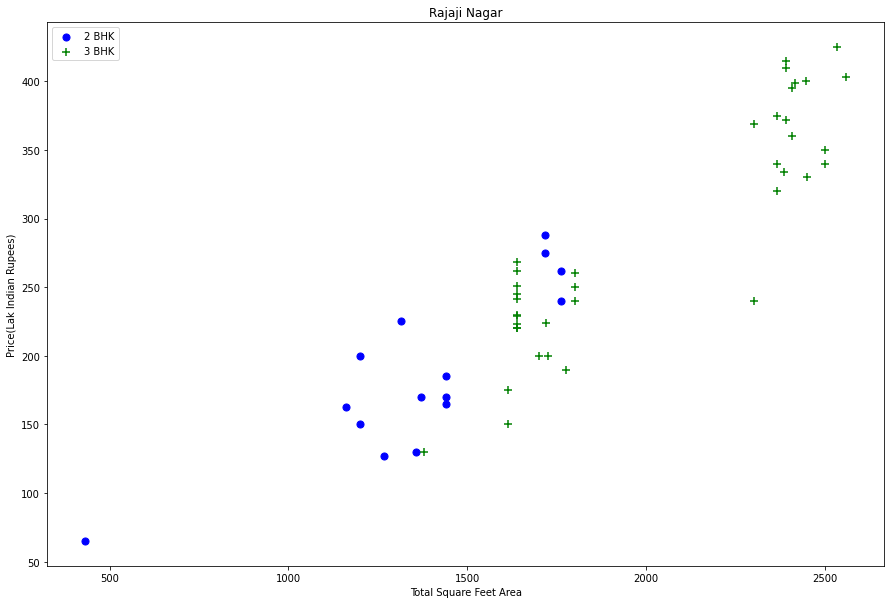

In [29]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price(Lak Indian Rupees)")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'count')

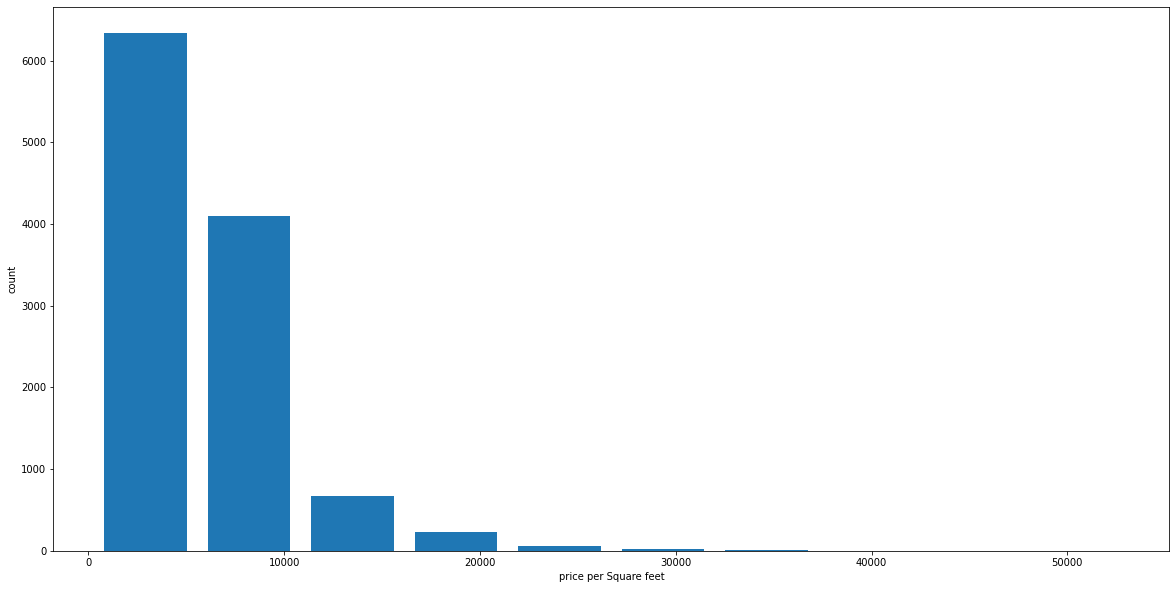

In [30]:
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("price per Square feet")
plt.ylabel("count")

Outlier removal using bathrooms feature

In [31]:
df5.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  8.,  1.,  7.,  9., 10., 12., 14., 27.,
       11., 16., 15., 13., 18.])

Text(0, 0.5, 'Count')

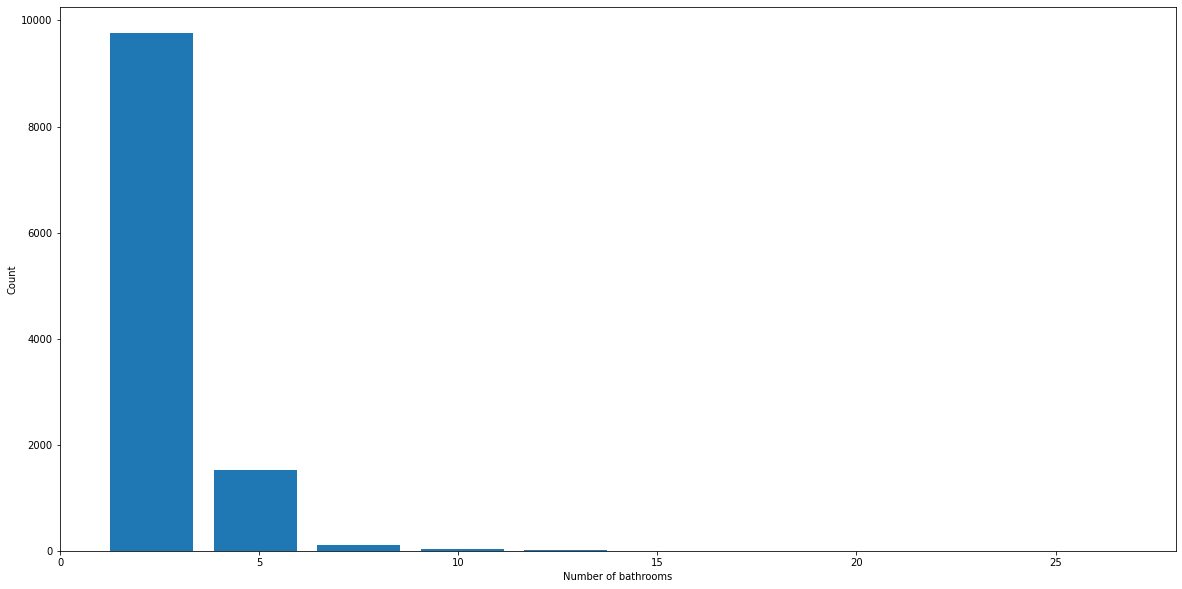

In [32]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [33]:
df5[df5.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5645,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8808,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
8942,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
8952,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
9003,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9235,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9291,other,19 BHK,2000.0,16.0,490.0,19,24500.000000
9344,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9629,other,14 BHK,1250.0,15.0,125.0,14,10000.000000
10280,other,11 BHK,6000.0,12.0,150.0,11,2500.000000


In [34]:
df5[df5.bath<df5.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.00,7,9139.784946
...,...,...,...,...,...,...,...
11429,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
11430,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
11431,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
11432,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [35]:
df6 = df5[df5.bath<df5.bhk+2]
df6.shape

(11307, 7)

In [36]:
df7 = df6.drop(['size','price_per_sqft'],axis='columns')
df7.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6


Using one hot encodinhg for location

In [37]:
dummies = pd.get_dummies(df7.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df9 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df10 = df9.drop('location', axis='columns')

In [40]:
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.00,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.00,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,812.0,1.0,26.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11430,1440.0,2.0,63.93,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11431,1075.0,2.0,48.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11432,1200.0,5.0,325.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df10.shape

(11307, 244)

In [42]:
df10.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**BUILD A MODEL**

In [43]:
x = df10.drop(['price'],axis='columns')
y = df10.price

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [45]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.5194705404524205

Using  K fold cross validation to mesure accuracy of linear regression model

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.46159468, 0.57787149, 0.61932374, 0.22170991, 0.50560714])

**FINDING THE BEST MODEL USING GRID SEARCH**

In [47]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
  algos = {
      'linear_regression' : {
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
          }
      },
      'lasso': {
          'model': Lasso(),
          'params': {
              'alpha':[1,2],
              'selection' : ['random', 'cyclic']
          }
      },
      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'params':{
              'criterion' : ['mse','friedman_mse'],
              'splitter': ['best','random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(x,y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.477221,{'normalize': False}
1,lasso,0.416492,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.385306,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [48]:
pred= lr_clf.predict(x_test)

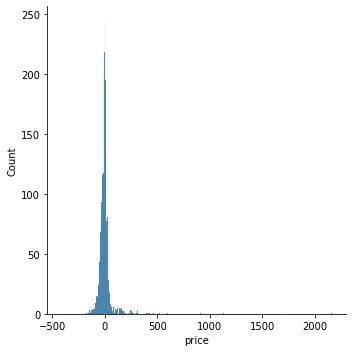

In [49]:
import seaborn as sns
sns.displot(y_test-pred)

**Based on above result we can say that linear regression gives the best score**

**We gonna use now the Autot SK Learn (AUTO ML)**

In [50]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [51]:
import autosklearn 

In [52]:
import autosklearn.regression as reg

we gonna use the same data we used for previous ML models

In [53]:
x_train.shape

(9045, 243)

In [54]:
automl = reg.AutoSklearnRegressor(time_left_for_this_task=120,per_run_time_limit=30)

In [55]:
automl.fit(x_train,y_train)

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

In [56]:
print(automl.leaderboard())

          rank  ensemble_weight         type      cost   duration
model_id                                                         
4            1             0.82  extra_trees  0.521009   8.098394
3            2             0.18  extra_trees  0.528951  25.942151


In [57]:
print(automl.show_models())

{4: {'model_id': 4, 'rank': 1, 'cost': 0.5210088080275231, 'ensemble_weight': 0.82, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f80faf6e250>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f80fafcfcd0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f80faf627d0>, 'sklearn_regressor': ExtraTreesRegressor(bootstrap=True, max_features=0.2477939208870194,
                    min_samples_leaf=2, min_samples_split=4, n_estimators=512,
                    n_jobs=1, random_state=1, warm_start=True)}, 3: {'model_id': 3, 'rank': 2, 'cost': 0.5289508084166955, 'ensemble_weight': 0.18, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f80faf6dbd0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f80

In [58]:
ypred2= automl.predict(x_test)
ypred2

array([418.92650604, 100.10013771, 124.13411713, ..., 119.12181282,
        50.41928482,  53.77463055])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


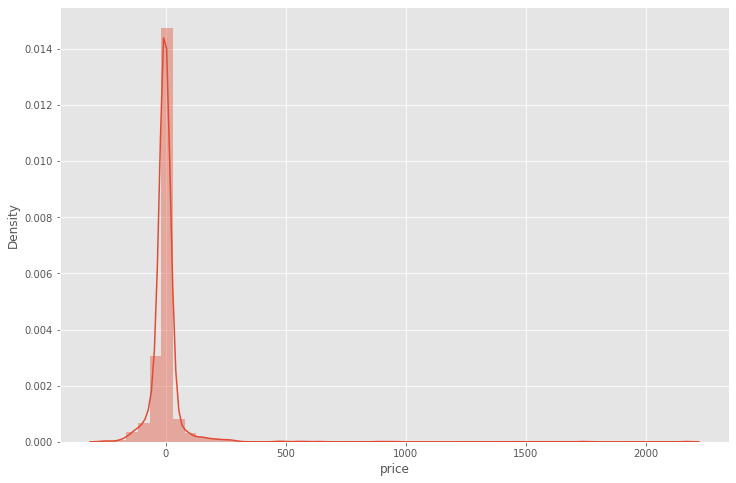

In [59]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred2)
plt.show()

In [61]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,ypred2))
print('MSE:', metrics.mean_squared_error(y_test,ypred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,ypred2)))

MAE: 28.67011432063358
MSE: 6887.287115458762
RMSE: 82.98968077694215
